In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [62]:
# Загрузка данных для обучения и тестирования
train_df = pd.read_csv('../data/raw/mitbih_train.csv', header=None)
test_df = pd.read_csv('../data/raw/mitbih_test.csv', header=None) 

In [63]:
# Посмотрим краткую информацию и размерность двух датафреймов
print(train_df.info())
print(train_df.shape)

print(test_df.info())
print(test_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None
(87554, 188)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None
(21892, 188)


In [64]:
# Посмотрим как выглядят данные
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Зафиксируем столбец с таргетом
target_column_index = train_df.shape[1] - 1

# Посчитаем количество записей для каждого класса
train_df[target_column_index]=train_df[target_column_index].astype(int)
equilibre_train = train_df[target_column_index].value_counts()

print(equilibre_train)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


In [66]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [67]:
unique_classes = train_df.iloc[:, target_column_index].unique()

# Метки классов
class_labels = {
    0: 'Нормальные удары',
    1: 'Наджелудочковые экстрасистолы',
    2: 'Желудочковые экстрасистолы',
    3: 'Фузионные удары',
    4: 'Неклассифицируемые удары'
}

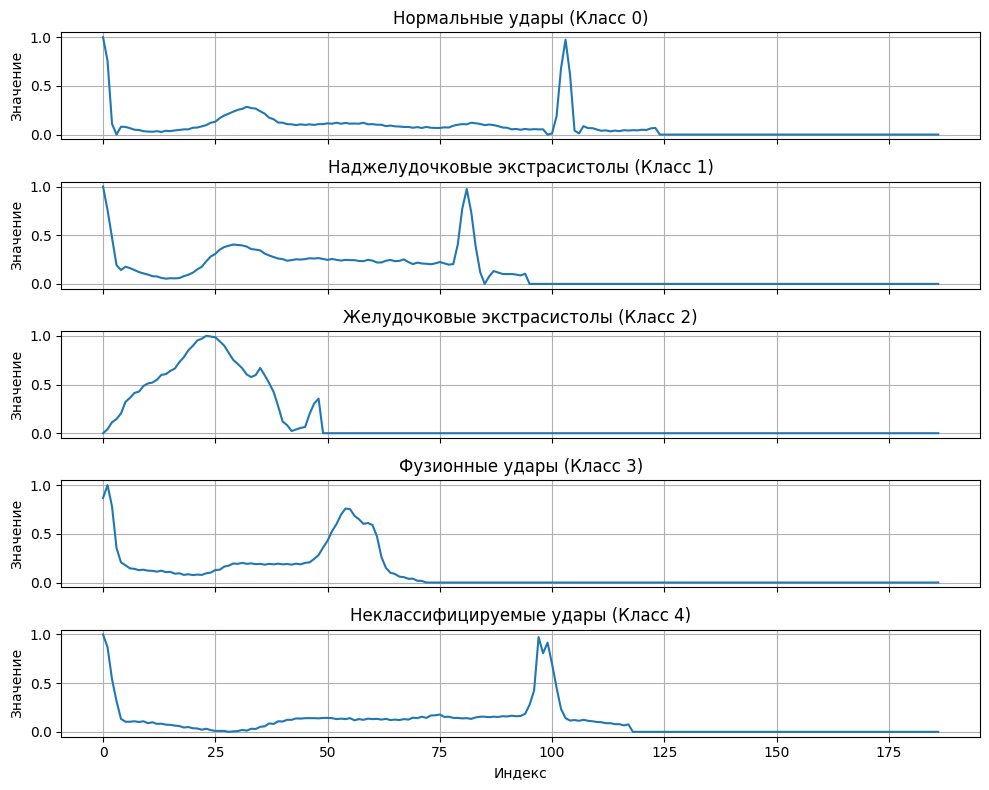

In [68]:
# Создаем одно общее полотно для графиков
fig, axes = plt.subplots(len(unique_classes), 1, figsize=(10, 8), sharex=True)

# Построение графиков для одного значения из каждого класса
for idx, class_label in enumerate(unique_classes):
    # Находим первую строку с данным классом
    class_sample = test_df[test_df.iloc[:, target_column_index] == class_label].iloc[0, :target_column_index]

    axes[idx].plot(class_sample)
    axes[idx].set_title(f'{class_labels[class_label]} (Класс {class_label})')
    axes[idx].set_ylabel('Значение')
    axes[idx].grid(True)

plt.xlabel('Индекс')
plt.tight_layout()
plt.show()

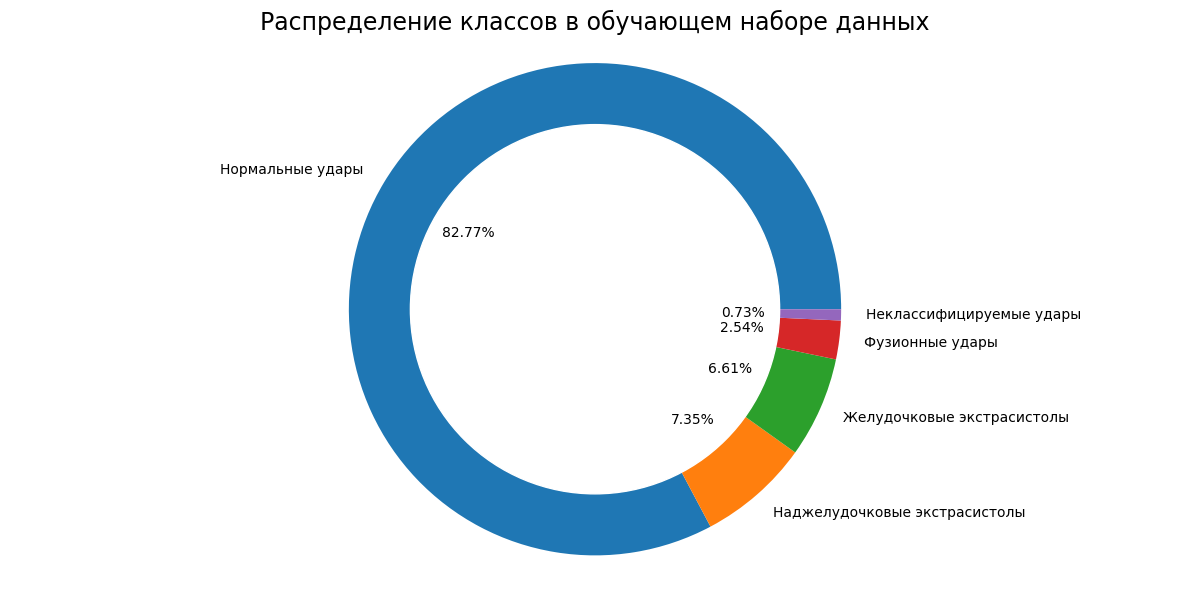

In [70]:
# Подсчитываем количество строк для каждого класса
class_counts = train_df.iloc[:, target_column_index].value_counts()

labels = ['Нормальные удары', 'Наджелудочковые экстрасистолы', 'Желудочковые экстрасистолы', 'Фузионные удары', 'Неклассифицируемые удары']

# Создаем круговую диаграмму
plt.figure(figsize=(12, 6))
plot_circle = plt.Circle((0, 0), 0.75, color='white')

plt.pie(class_counts,
        labels=labels,
        autopct='%1.2f%%',
        textprops={'color': 'black'})

p = plt.gcf()
p.gca().add_artist(plot_circle)

plt.title('Распределение классов в обучающем наборе данных', fontsize=17)
plt.axis('equal')  
plt.tight_layout()
plt.show()